<a href="https://colab.research.google.com/github/Ka275578/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_risk_prediction_second_commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name** - Kumar Anand
##### **email** - ka275578@gmail.com 

# **Project Summary -**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). 

The dataset provides the patients information. It includes over 4,000 records and 15 attributes.

Now a days people are going more towards sedentary lifestyle. Due to inactive lifestyle and consumption of tobacco the risk of CHD is increasing day by day.

In this project we will be developing various machine learning models which will predict the 10yr future risk of CHD.

Following are the ML models used and the respective hyperparameter used for tuning -

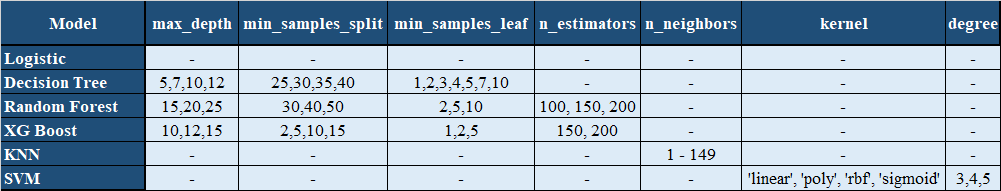

Predictions made by these models will predict the future 10yr risk of CHD which will help people to take precautions beforehand and come out of the risk.

Following metrics shows how the vaious ML models is performing -

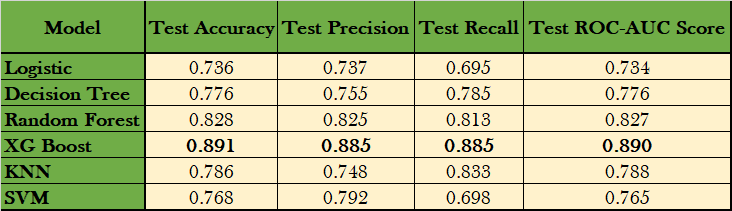

XG Boost is the best performer among all the model with ROC_AUC score of 90%.

# **GitHub Link -**

https://github.com/Ka275578/Cardiovascular_Risk_Prediction

# **Problem Statement**

* Now a days people are deviating more towards sedentary lifestyle.
* Due to inactive lifestyle and increase in fatty food consumption health of the people are decreasing day by day and problems like cholestrol, diabetes etc are increasing day by day.
* Also, there is an increase in tobacco consumption which also puts lot of life threatening diseases.
* Due to these reasons the risk of future 10yr coronary heart disease (CHD) has increased a lot.
* It has become need of the time to predict the 10yr CHD beforehand so that people can be cautious of their lifestyle.
* In this project our classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) from dataset of an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [2]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
cvr_path = '/content/mydrive/MyDrive/Cardiovascular_risk_prediction/data_cardiovascular_risk.csv'
cvr_df = pd.read_csv(cvr_path)

### Dataset First View

In [4]:
#First look at the dataset
cvr_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#Checking shape of the dataset
cvr_df.shape

(3390, 17)

There are 3390 rows and 17 features/columns in the dataset. Let's explore more to know the features.

### Dataset Information

In [6]:
#Info of the dataset
cvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

we can see there are some feature which doesn't contains all the data. Let's explore more.

In [7]:
#Checking duplicate values
cvr_df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

We can see that id has 3390 unique values. This shows that there is no duplicate entries in the dataset.

#### Missing Values/Null Values

In [8]:
#Checking null values in the dataset
cvr_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

There are null values in education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose feature. We will be filling the null values in the Data Cleaning section.

### Initial insights on the dataset -

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

Following are the features in the dataset -

Independent Variables -
id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate & glucose

Dependent Variable - 
TenYearCHD

Our goal is to properly classify "TenYearCHD" based on the independent features present in the dataset using machine learning classification problems.

There is no duplicate observations in the dataset though there are some null values present in the dataset which we will be treating in the later sections of the project.

## ***2. Understanding Your Variables***

In [9]:
#Columns in the dataset
cvr_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Categorical Variables - education, sex, is_smoking, BPMeds, prevalentStroke, prevalentHyp, diabetes, TenYearCHD (Target Variable).

Continuous Variables - age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose

In [10]:
#Describe ta data
cvr_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

Demographic:
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* education: There is no details provided for this feature.

Behavioral:
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical(history):
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

Predict variable (desired target):
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [11]:
#Datatype of each features
cvr_df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

education and BPMeds are of float type but these are categorical variables. After filling the null values we will convert it to int datatype.

## 3. ***Data Wrangling***

### Data Cleaning

education and BPMeds are categorical variables. So, we will be filling the null values with mode of the data of the respective columns.
cigsPerDay, totChol, BMI, heartRate and glucose are continuous variables. We will be filling the null values with the median of the data of the respective columnns.

In [12]:
#Displaying the rows where null values are present in cigsPerDay
cvr_df[cvr_df['cigsPerDay'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [13]:
#Checking median for cigsPerDay
cvr_df['cigsPerDay'].median()

0.0

The median for cigsPerDay is coming as zero and if we are filling the null values of cigsPerDay as zero it will not be correct as in is_smoking it is mentioned as Yes. So, we will be filling the null values of cigsPerDay with mean of the data.

In [14]:
#Function to fill the null values with mode
def fill_null_mode(cols):
  ''' This function fills the null values of any columns with mode of the data.
  pass the list of column names for which you want to fill the null values'''
  for col in cols :
    cvr_df[col] = cvr_df[col].fillna(round(cvr_df[col].mode()[0],1))

In [15]:
#Function to fill the null values with median
def fill_null_median(cols):
  ''' This function fills the null values of any columns with median of the data.
  pass the column name for which you want to fill the null values'''
  for col in cols:
    cvr_df[col] = cvr_df[col].fillna(cvr_df[col].median())

In [16]:
#Filling the null values
fill_null_mode(['education','BPMeds'])
fill_null_median(['totChol','BMI','heartRate','glucose'])
cvr_df['cigsPerDay'] = cvr_df['cigsPerDay'].fillna(round(cvr_df['cigsPerDay'].mean(),1))

In [17]:
#Confirming if all the null values are filled
cvr_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

We have successfully filled all the null values in the dataset.

In [18]:
#education and BPMeds are categorical variables. Converting the datatype from float to int.
cvr_df['education'] = cvr_df['education'].astype(int)
cvr_df['BPMeds'] = cvr_df['BPMeds'].astype(int)

In [19]:
cvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   int64  
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   int64  
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(7),

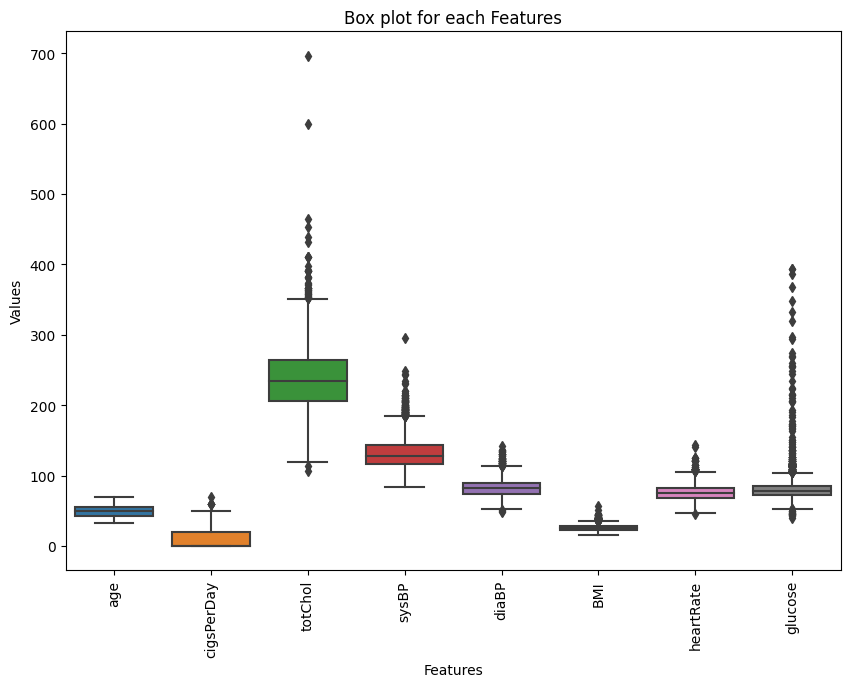

In [20]:
#Plotting the box plot for each feature.
plt.figure(figsize = (10,7))
plt.title("Box plot for each Features")
sns.boxplot(data = cvr_df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']])
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

Form the above graph we can infer that there are some outliers in some features especially in totChol, sysBP and glucose but in this project we have decided not to remove those outliers as these features are critical in predicting the ten year CHD and life of a person depends on these data so, we decided to work with these outliers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Let's explore each features one by one.

####Functions to plot each graphs

In [49]:
#Function to plot Bar graph
def bar_graph(col):
  '''This function plots the bar_graph for the given data.
  Pass the feature name (str) to plot the graph'''
  plt.figure(figsize = (20,7))
  plt.title(f'Distribution of {col}')
  sns.countplot(x=col,data=cvr_df)
  plt.xticks(rotation = 90)
  plt.show()

countplot will be used for the better visuallization of the observational counts of the categorical variable. As it puts observational counts in different category-based bins using bars.

In [22]:
#Function to plot Pie chart
def pie_chart(col):
  '''This function plot the pie chart for the given data.
  Pass the feature name in str to plot the pie chart.'''
  plt.rcParams['font.size'] = 12
  plt.figure(figsize = (7,7))
  exp = (0.05,)*len(cvr_df[col].value_counts())
  cvr_df[col].value_counts().plot.pie(autopct = '%1.2f%%', explode = exp)
  plt.title(f'{col} percentage distribution')
  plt.axis('off')
  plt.show()

Pie charts are very much useful in displaying relative proportions of multiple classes of data. 

In this project pie chart will be used to visualize the various classes of the categorical variables.

In [89]:
#Function to plot the feature distribution with respect to TenYearCHD
def bar_wrt_TenYearCHD(col):
  '''This function plot the distribution for a given feature with respect to TenYearCHD.
  Pass the feature name in str to plot the graph.'''
  if len(cvr_df.groupby([col,'TenYearCHD'])['id'].count())>60:
    plt.figure(figsize = (30,15))
  else:
    plt.figure(figsize = (15,7))
  plt.title(f'{col} distribution with respect to TenYearCHD')
  sns.barplot(x = col, y = 'id', hue = 'TenYearCHD',data = cvr_df.groupby([col,'TenYearCHD'])['id'].count().reset_index())
  plt.legend(loc = 'upper right', title = 'TenYearCHD')
  plt.xticks(rotation = 90)
  plt.show()

Bar graph summarises the large set of data in simple visual form.

In this project the bar graph will be used to visualize how the features are distributed amongst the different classes of TenYearCHD.

In [24]:
#Function to plot histplot for numeric variables
def hist_num(col):
  '''This function plot the distribution for a given feature.
  Pass the feature name in str to plot the graph.'''
  plt.figure(figsize = (20,7))
  plt.title(f'{col} ')
  sns.histplot(data = cvr_df[col], kde = True)
  plt.show()

Histogram plots shows how the data is spred in the dataset by plotting frequency distribution of the dataset.
If there is a wide spread in data then histograms are more useful than normal bar plots in visualization as it gives a clear picture of the spread of the data.

In [68]:
#Pie chart to show how different classes of a col are effecting TenYearCHD.
def detailed_pie(col, title_1, title_2):
  ''' This function plot the pie chart showing how different classes of a col are effecting TenYearCHD.
  Pass feature name, title for the first pie chart and title for the second pie chart in str to plot the graph.'''
  check_df = cvr_df.groupby([col,'TenYearCHD'])['id'].count().reset_index()
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  check_df[check_df[col]==0]['id'].plot.pie(autopct = '%1.2f%%', label = '', title = title_1, explode =exp)
  plt.legend(title = 'TenYearCHD')
  plt.subplot(1,2,2)
  check_df[check_df[col]==1].reset_index().drop('index',axis = 1)['id'].plot.pie(autopct = '%1.2f%%', label = '', title = title_2, explode = exp) 
  plt.legend(title = 'TenYearCHD')
  plt.show()

####TenYearCHD

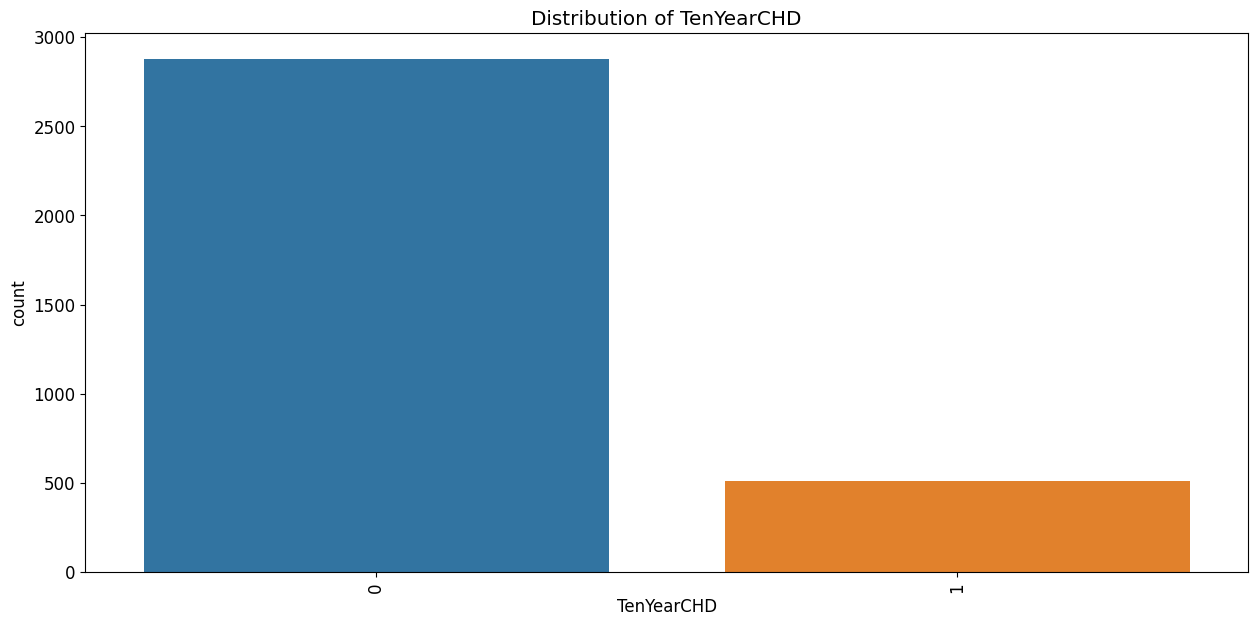

In [52]:
#"Distribution of feature "TenYearCHD".
bar_graph("TenYearCHD")

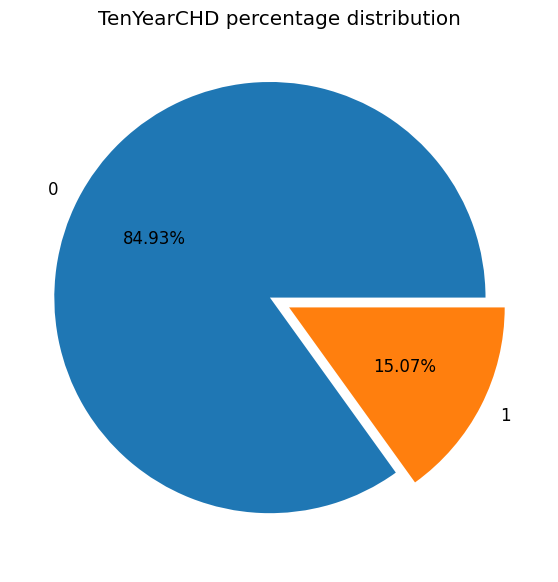

In [27]:
#Distribution of percentage "TenYearCHD" feature.
pie_chart("TenYearCHD")

TenYearCHD is dependent variable in the dataset. As it is a categorical variable predicting this will be a classification problem.

Here class 1 means there is a risk of coronary heart disease and class 0 means there is no risk of coronary heart disease.

We can infer from the pie chart that our dataset contains 85% class 0 and 15% class 1 entries. This clearly shows that there is class imbalance in the dataset.

We will be handling class imbalance in later part of the project.

#### age

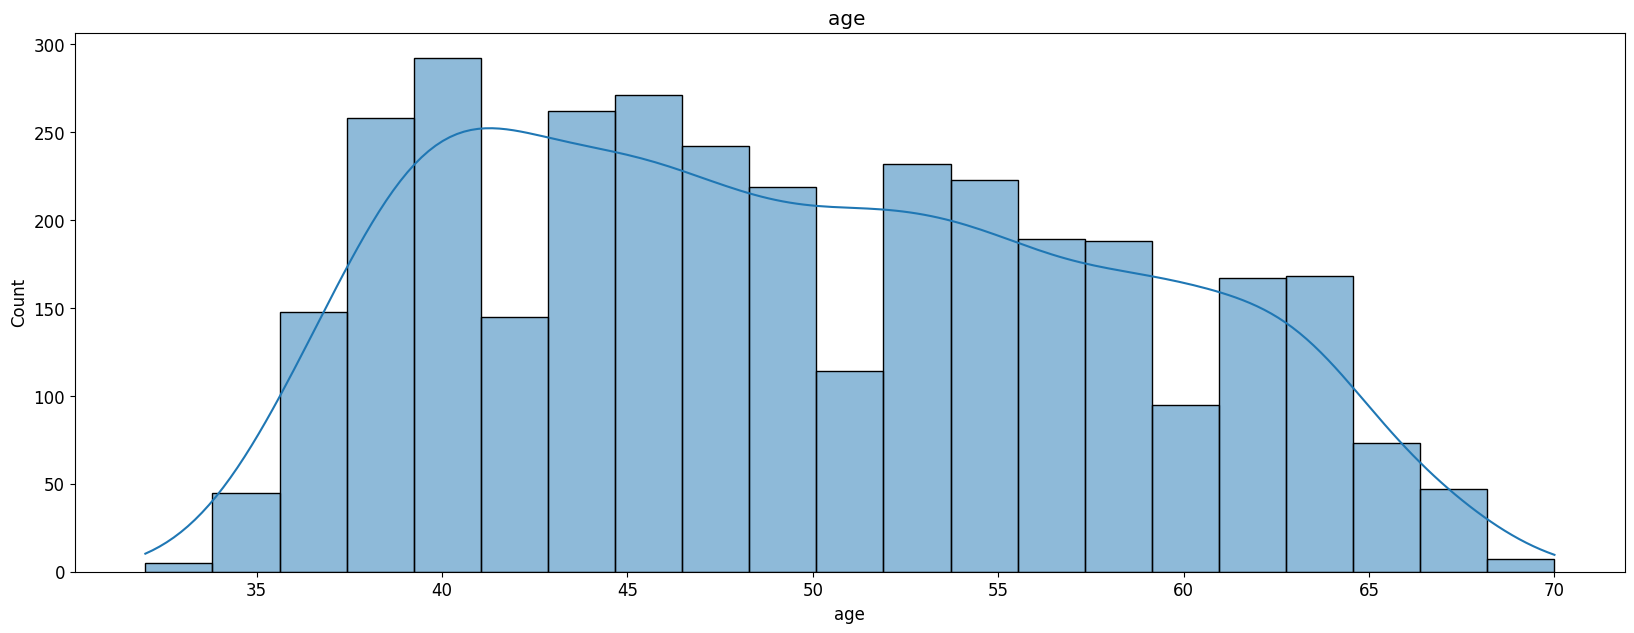

In [32]:
#Distribution of "age" feature.
hist_num('age')

Age is normally distributed between 35 to 70 where most number of people belongs to age group 40.

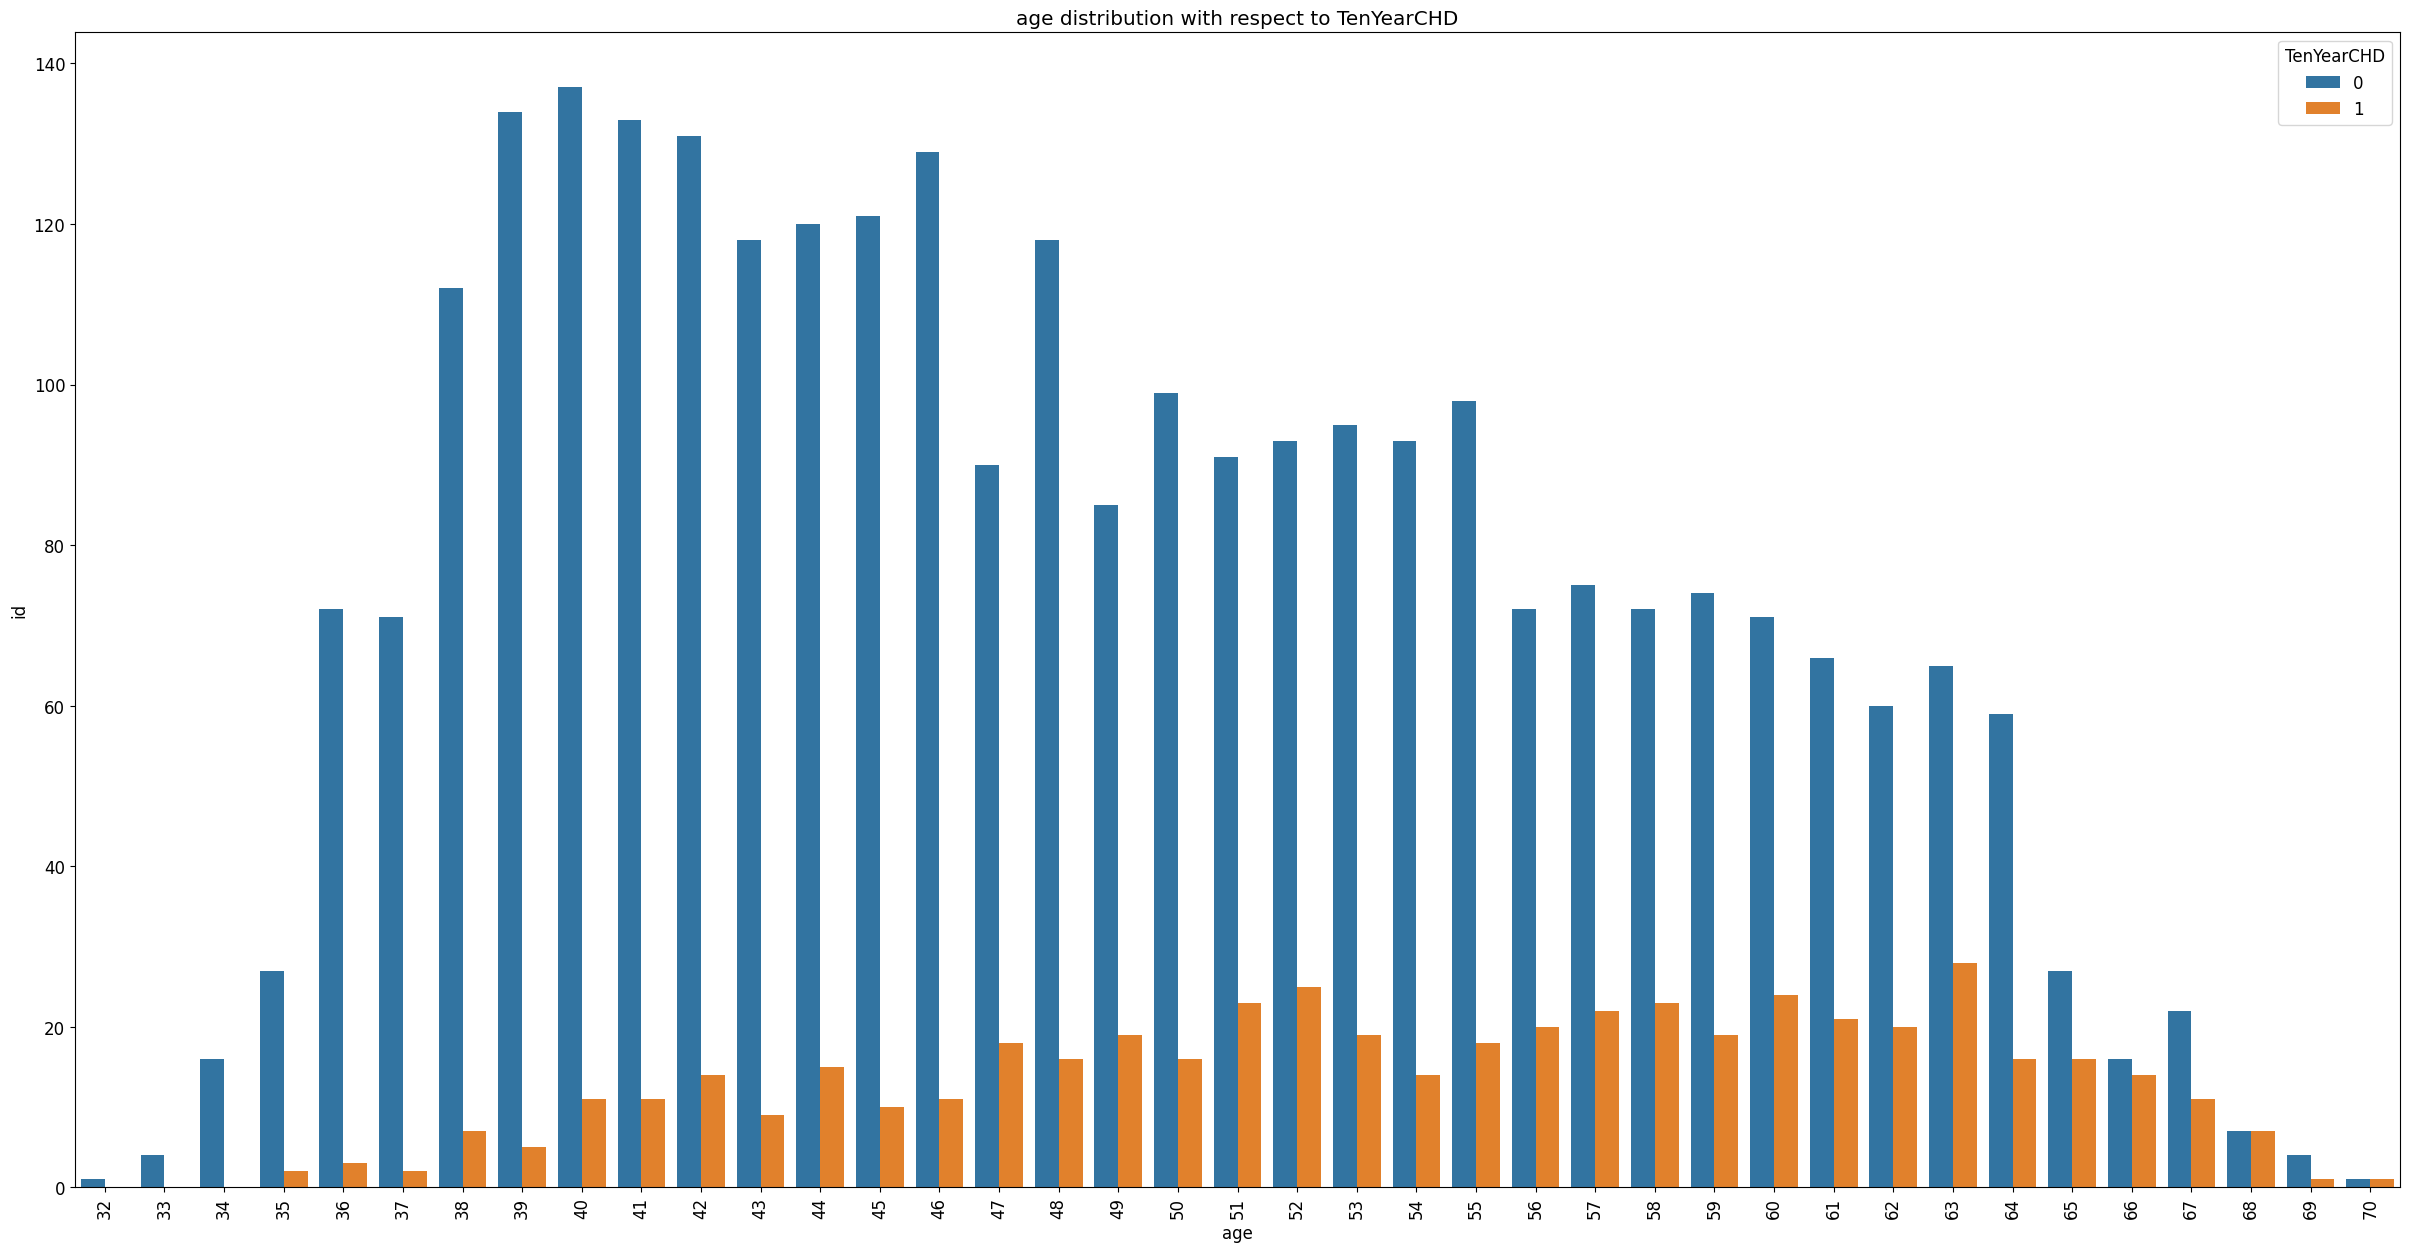

In [53]:
#Distribution of "age" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD('age')

The risk of CHD increases as the age increases from 35. People with age around 63 are at the highest risk of CHD.

#### education

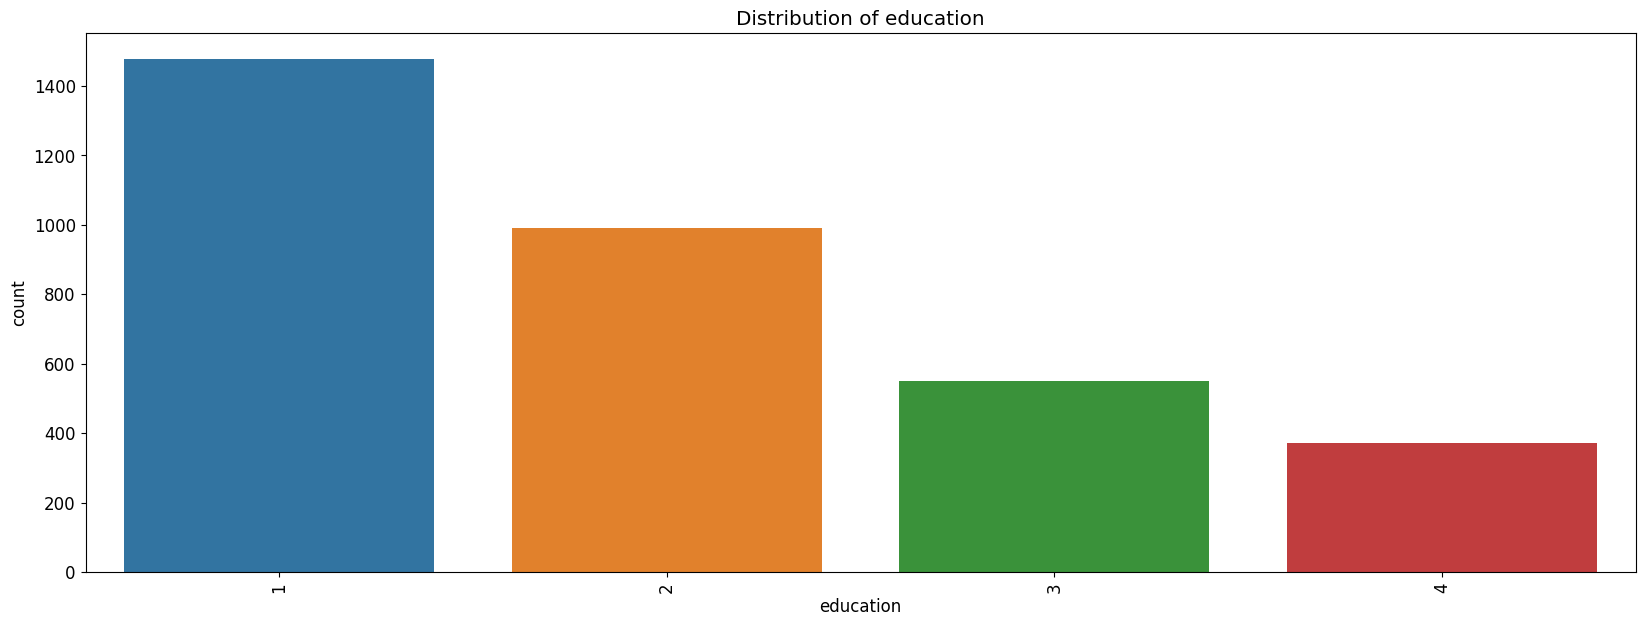

In [46]:
#Distribution of feature "education".
bar_graph("education")

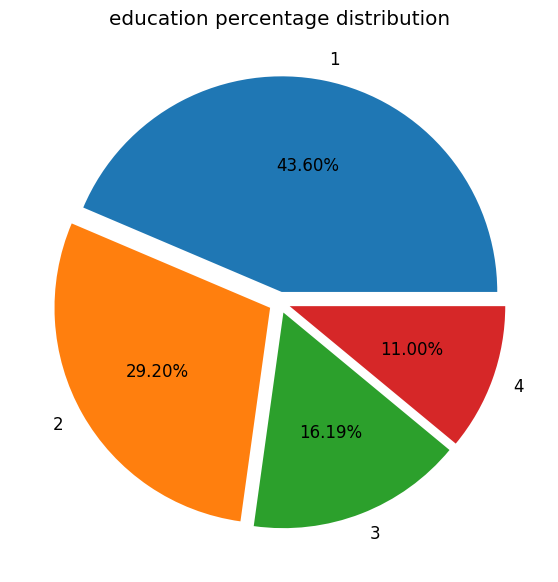

In [47]:
#Distribution of percentage "education" feature.
pie_chart("education")

There is no clear information given about education feature but we can infer from the graph that more number of people in the dataset are from type 1.

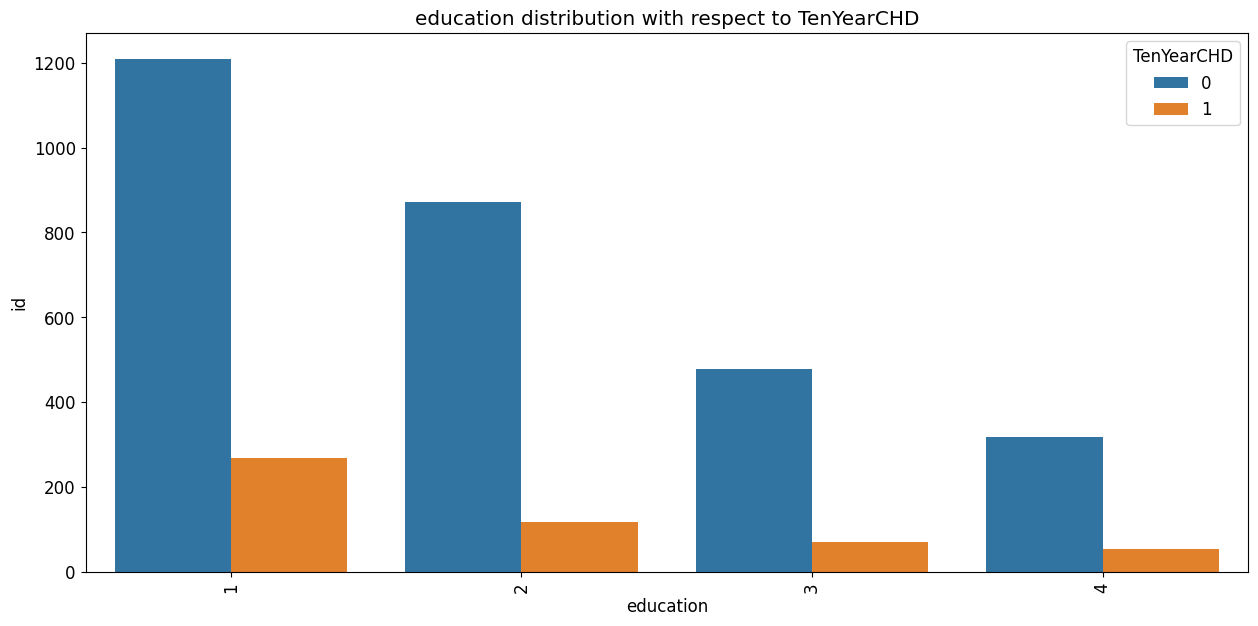

In [54]:
#Distribution of "education" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("education")

People belonging to education type 1 are at a higher risk of CHD then type 2 and type 3, people belonging to type 4 education are at the lowest risk of having CHD.

#### sex

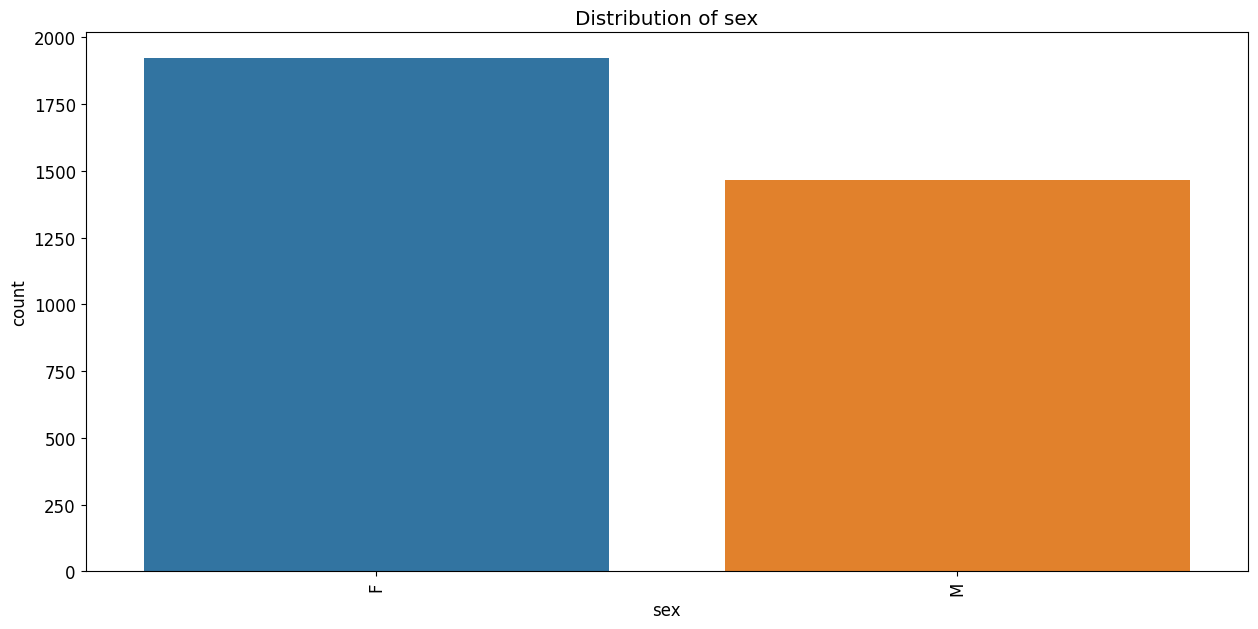

In [55]:
#Distribution of feature "sex".
bar_graph("sex")

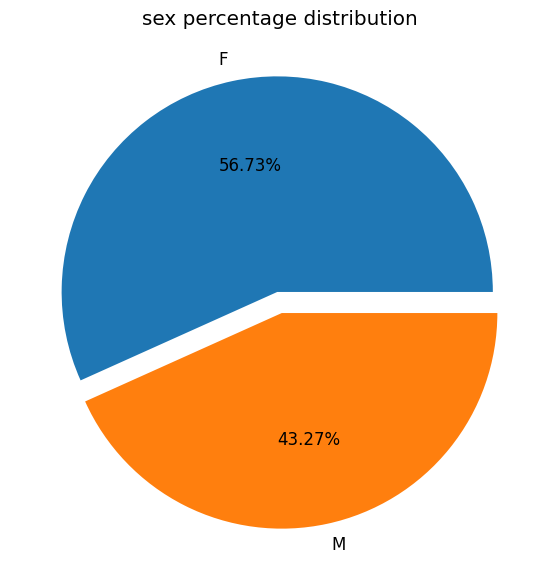

In [56]:
#Distribution of percentage "sex" feature.
pie_chart("sex")

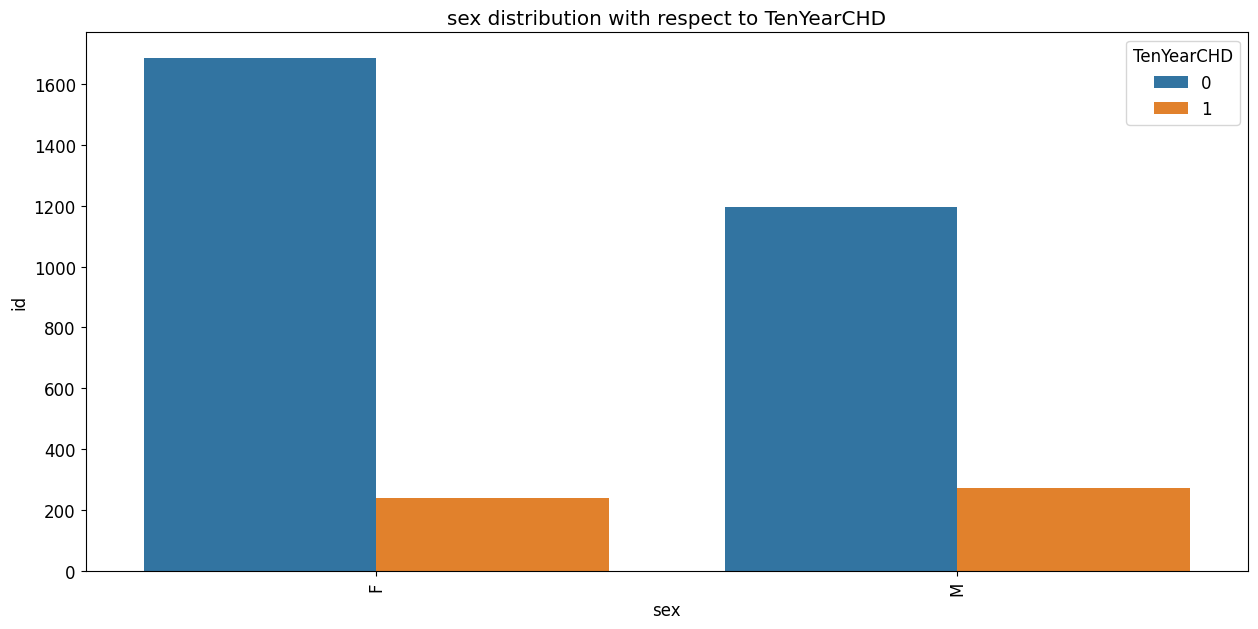

In [57]:
#Distribution of "sex" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("sex")

Even though the number of males are less than number of females in the dataset still males are having more risk of 10yr CHD as compared to females.

#### is_smoking

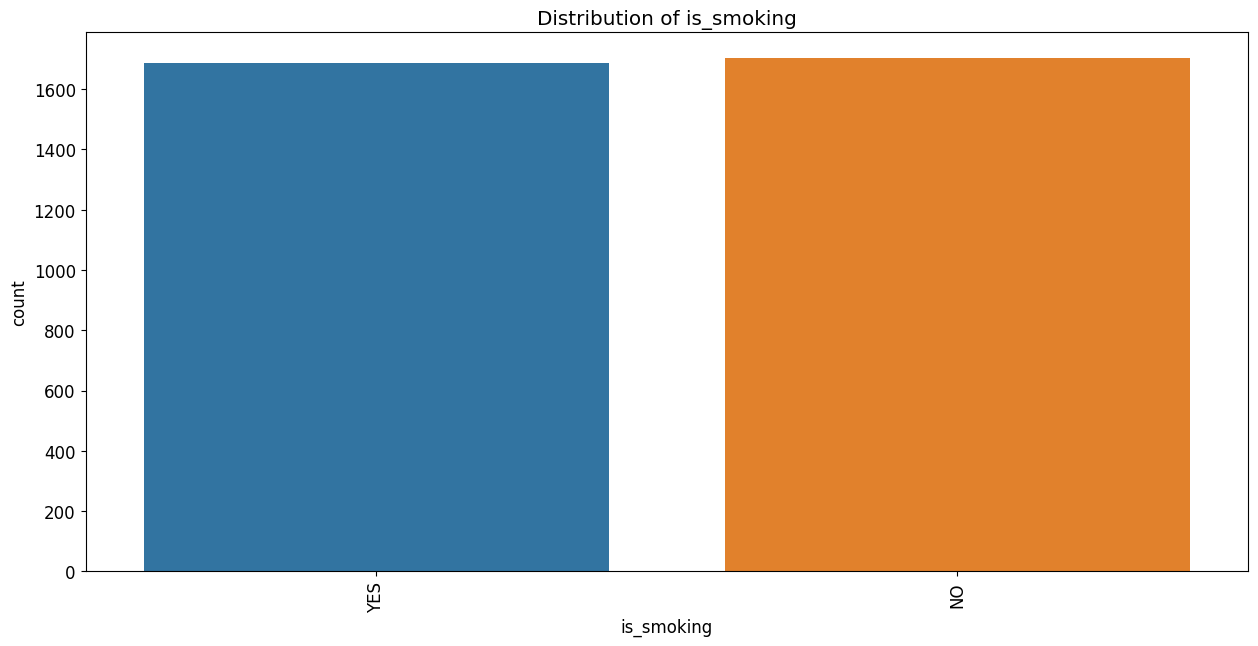

In [58]:
#Distribution of feature "is_smoking".
bar_graph("is_smoking")

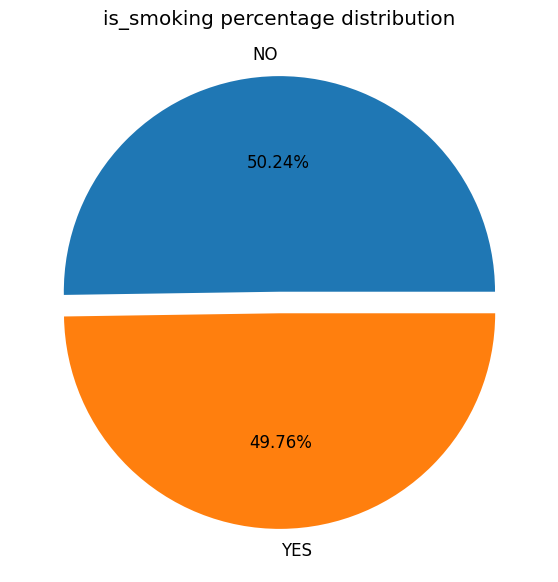

In [59]:
#Distribution of percentage "is_smoking" feature.
pie_chart("is_smoking")

Number of smokers and non-smokers are almost equal in the dataset.

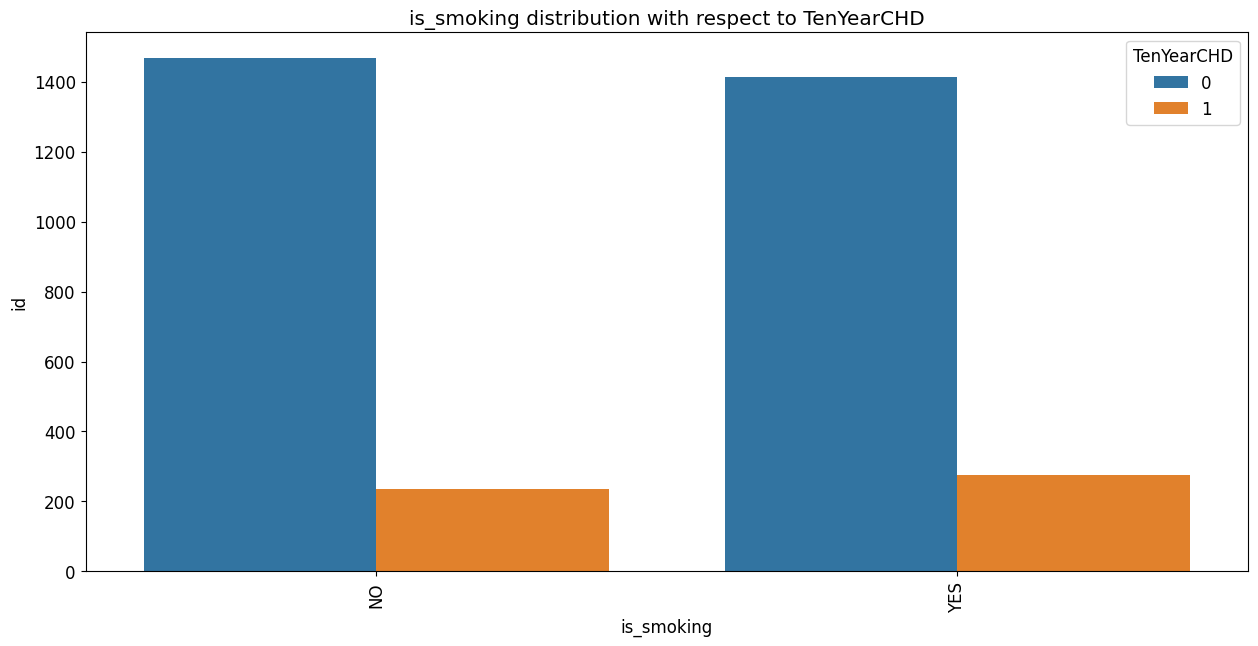

In [60]:
#Distribution of "is_smoking" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("is_smoking")

Risk of 10 yr CHD is more for smokers than non smokers. This feature is not the only contirbuting factor to CHD there are several other features which will effect the risk of CHD.

#### cigsPerDay

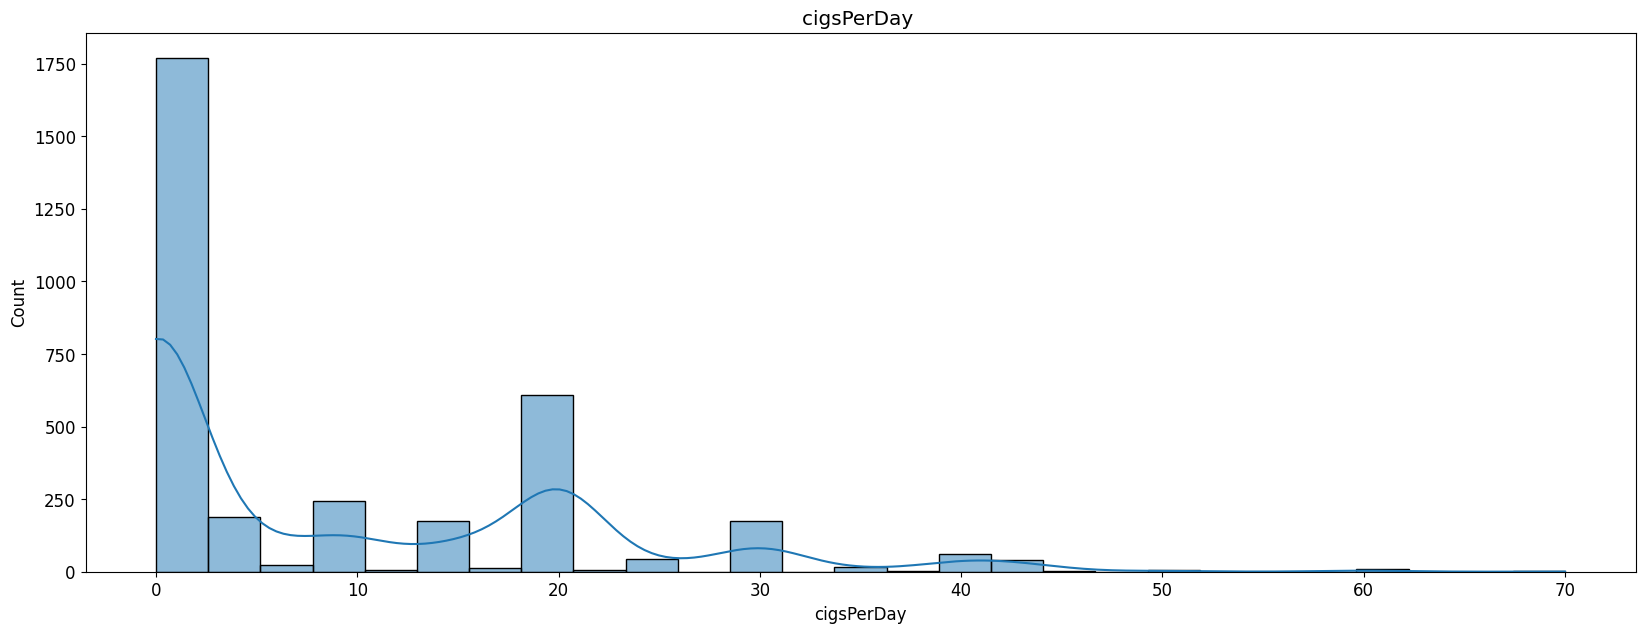

In [62]:
#Distribution of feature "cigsPerDay".
hist_num("cigsPerDay")

Above graph shows that most of the observation in the dataset are from non smokers.

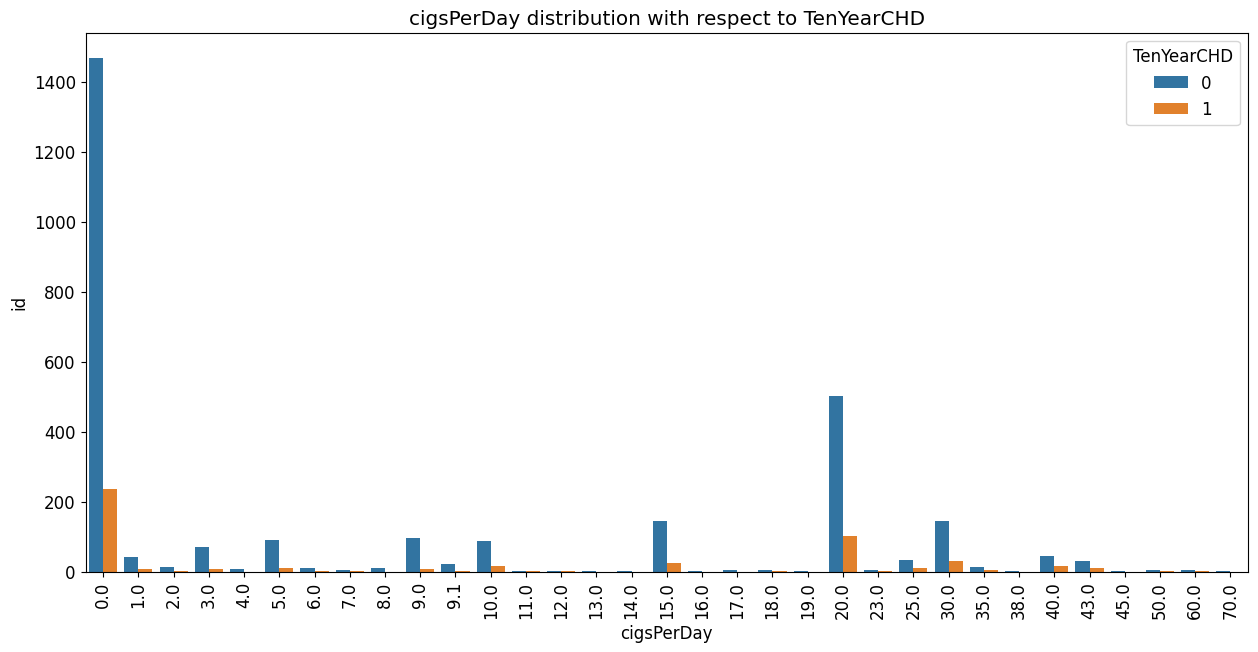

In [63]:
#Distribution of "cigsPerDay" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("cigsPerDay")

Reading above graph can be a little bit confusing as in the first sight any one will understand that people having 0.0 cigsPerDay are at higher risk of TenYearCHD. But this is not the case. When we add the counts for the smokers it will be more than the non-smokers, as we saw in the visualization of 'is_smoking'. 

As per this dataset along with the number of cigsPerDay other factors are also responsible for CHD risk.

#### BPMeds

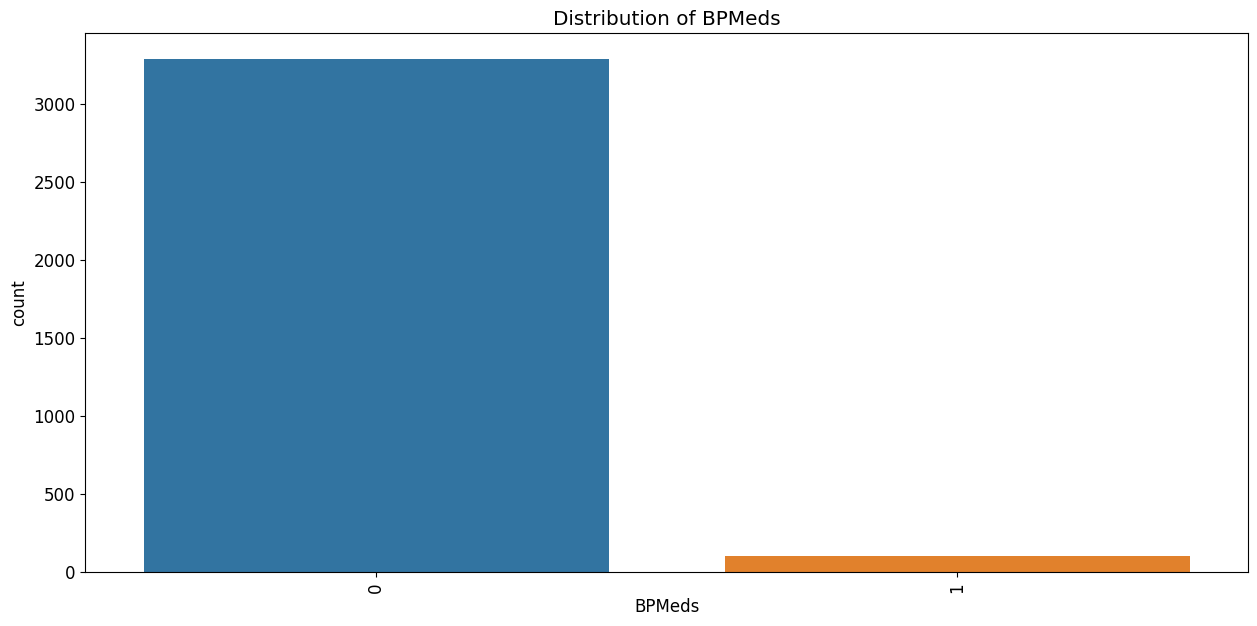

In [64]:
#Distribution of feature "BPMeds".
bar_graph("BPMeds")

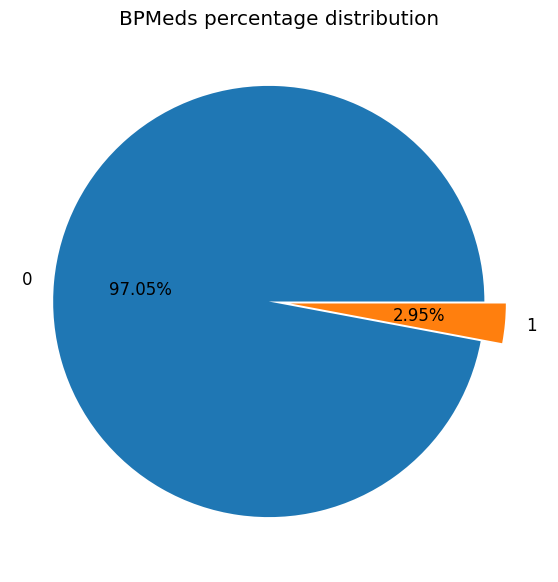

In [65]:
#Distribution of percentage "BPMeds" feature.
pie_chart("BPMeds")

As per our data 97% of the people were not on a BP medication and only 3% of people were on BP medication.

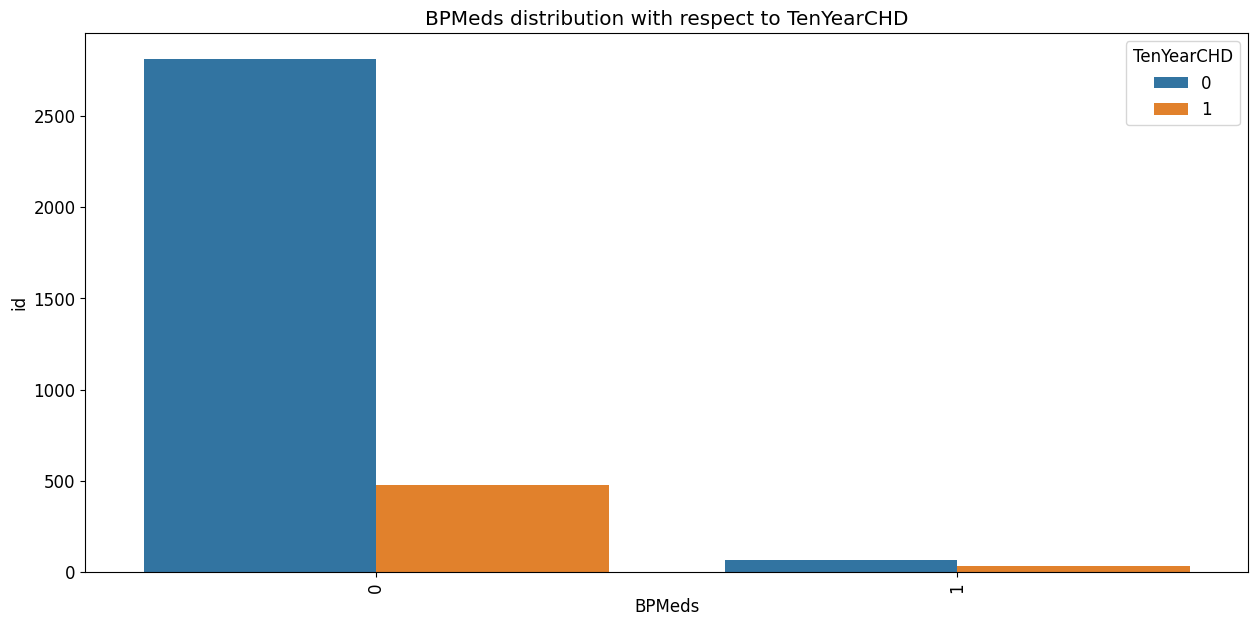

In [66]:
#Distribution of "BPMeds" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("BPMeds")

Since there are more number of people who are not on BP Meds it is bit difficult to read the above graph. We will be plotting the pie chart to define the above graph.

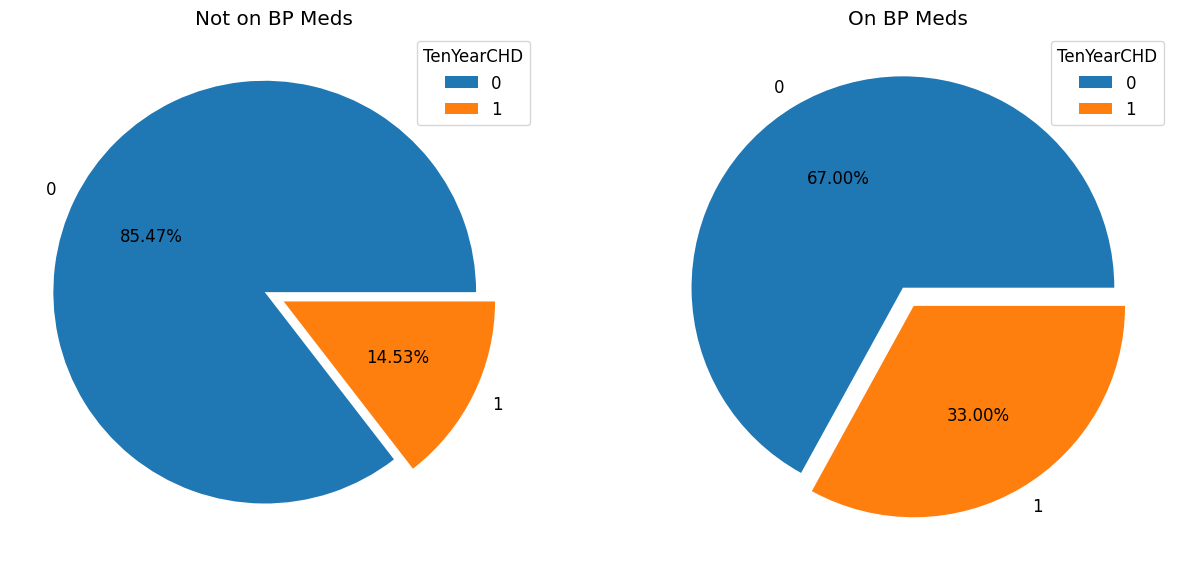

In [69]:
#Pie chart showing how different classes of BPMeds are distributed among the different classes of TenYearCHD
detailed_pie('BPMeds','Not on BP Meds','On BP Meds')

So, from the above graph we infer that people who are not on BP Meds 14.5% chance is there of having CHD where as if a person is on BP Meds then 33% chance of having CHD is there. 

#### prevalentHyp

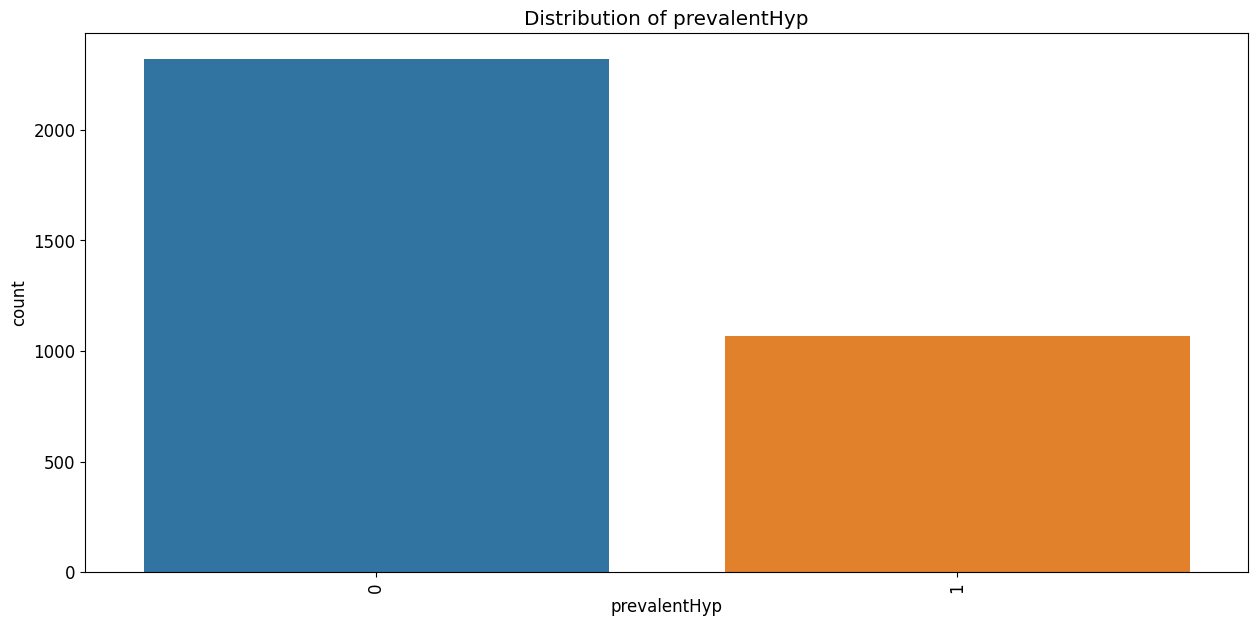

In [70]:
#Distribution of feature "prevalentHyp".
bar_graph("prevalentHyp")

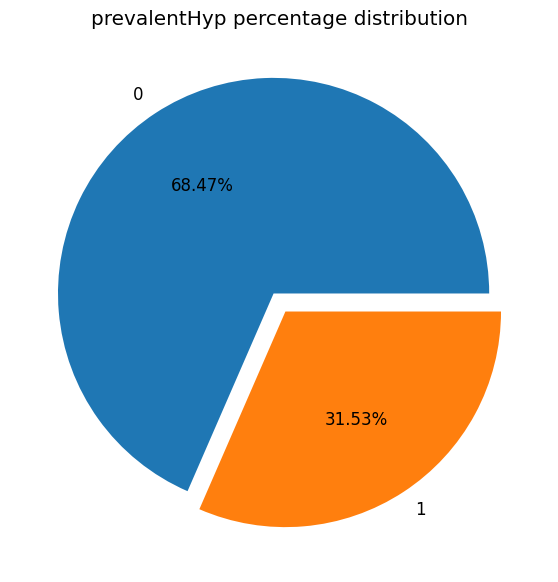

In [71]:
#Distribution of percentage "prevalentHyp" feature.
pie_chart("prevalentHyp")

In the dataset there are 68% observation who doesn't have hypertension and 32% are suffering from hypertension.

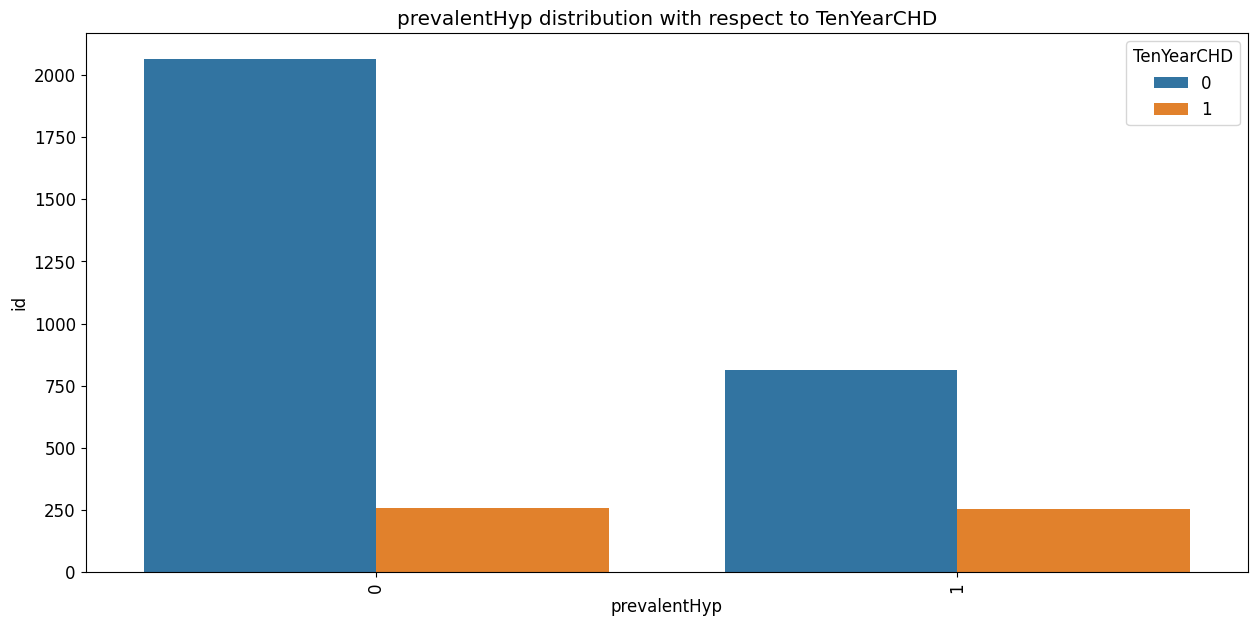

In [72]:
#Distribution of "prevalentHyp" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("prevalentHyp")

From the above graph it looks like people who are hypertensive and people who are not hypertensive both are at the same risk of CHD but the percentage is different which will be clear from the following graph.

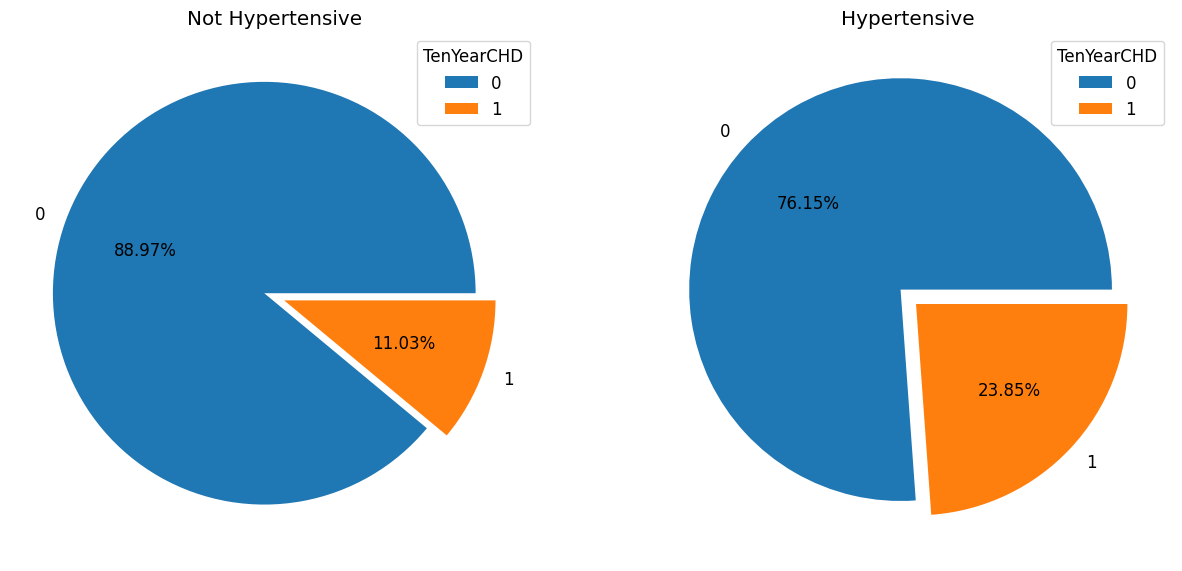

In [73]:
#Pie chart showing how different classes of prevalentHyp are distributed among the different classes of TenYearCHD
detailed_pie('prevalentHyp','Not Hypertensive','Hypertensive')

The above graph shows that from the person who are not hypertensive 11% of them are at the risk of TenYearCHD whereas the person who are hypertensive 24% of them are at the risk of TenYearCHD.

#### prevalentStroke

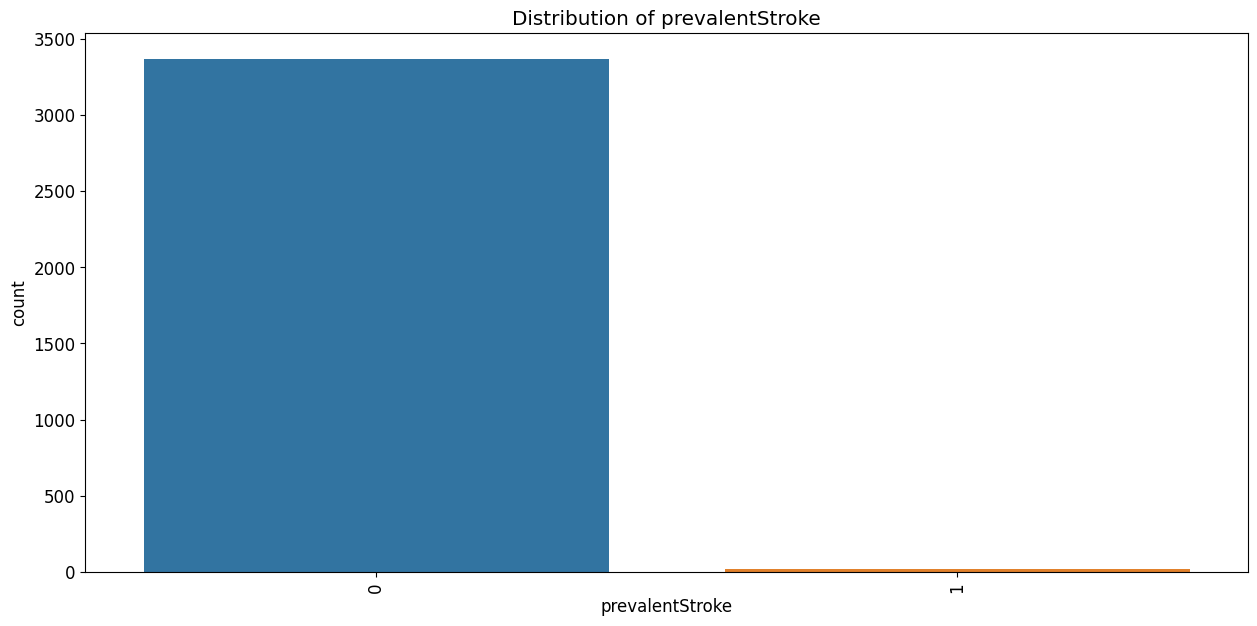

In [76]:
#Distribution of feature "prevalentStroke".
bar_graph("prevalentStroke")

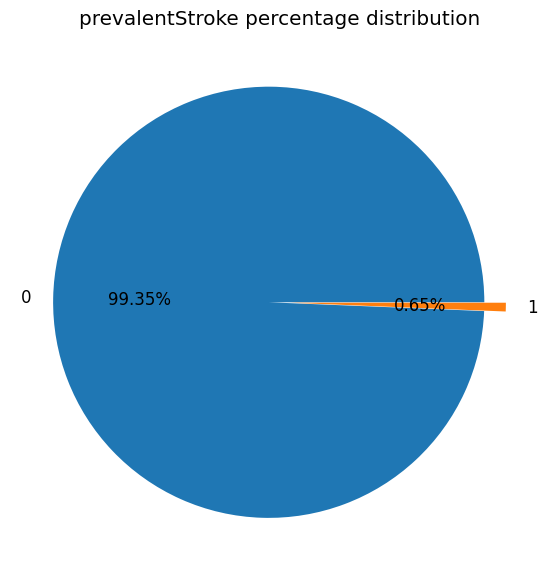

In [77]:
#Distribution of percentage "prevalentStroke" feature.
pie_chart("prevalentStroke")

Number of people having stroke previously are very less in the dataset. Only 0.65% of people had stroke before.

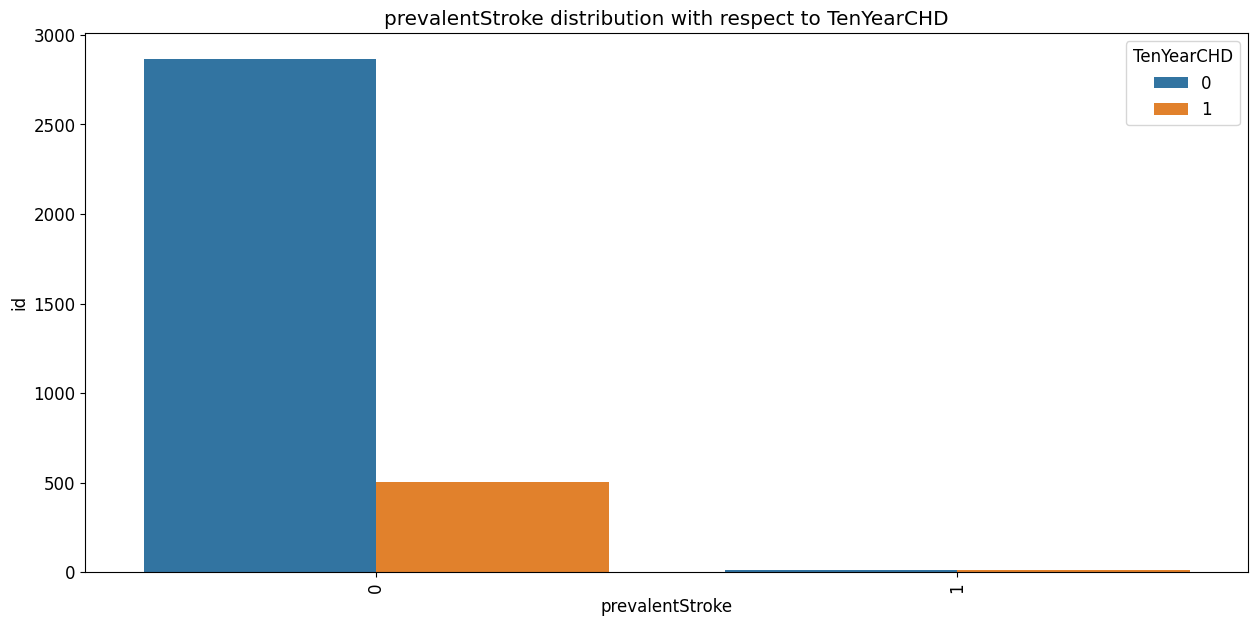

In [78]:
#Distribution of "prevalentStroke" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("prevalentStroke")

Since the number of people having stroke before is very less the above graph is bit difficult to read lets plot detailed pie chart to visualize it properly.

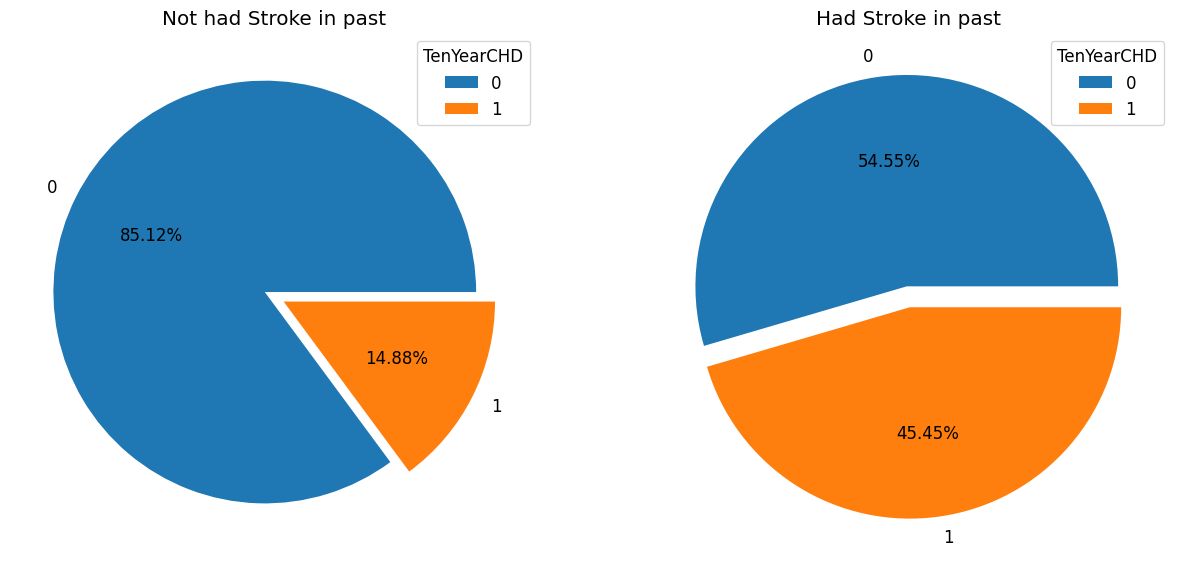

In [79]:
#Pie chart showing how different classes of BPMeds are distributed among the different classes of TenYearCHD
detailed_pie('prevalentStroke','Not had Stroke in past','Had Stroke in past')

From the above graph we infer that whichever person having stroke in the past 45% of them has a risk of CHD.

#### prevalentHyp

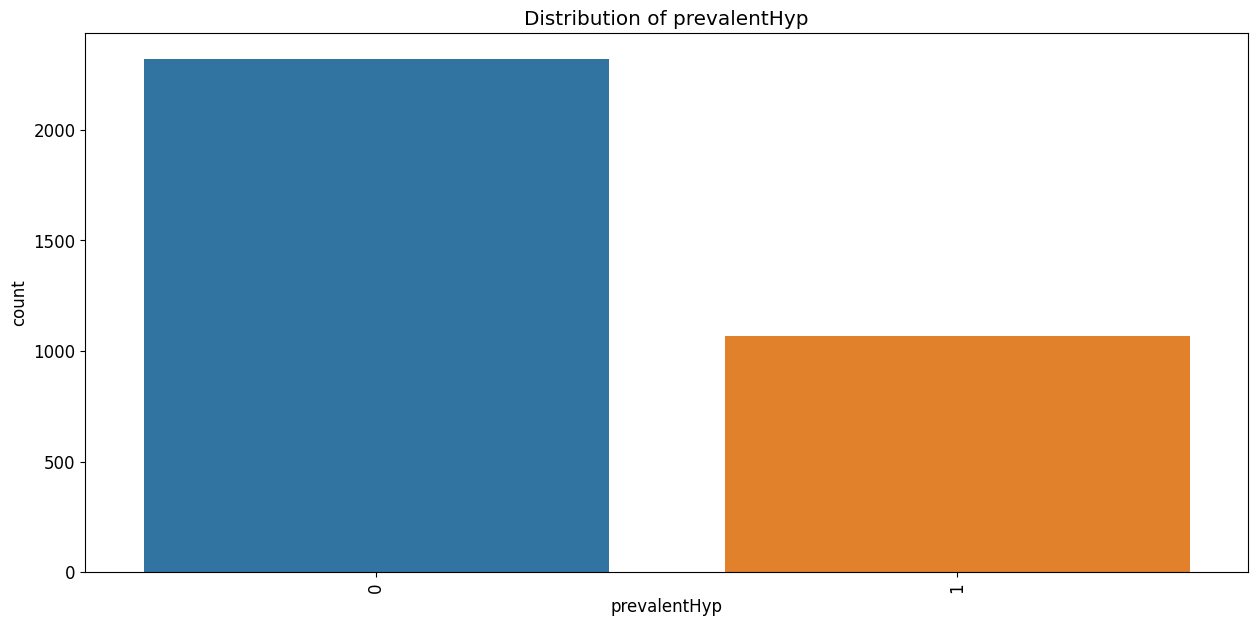

In [80]:
#Distribution of feature "prevalentHyp".
bar_graph("prevalentHyp")

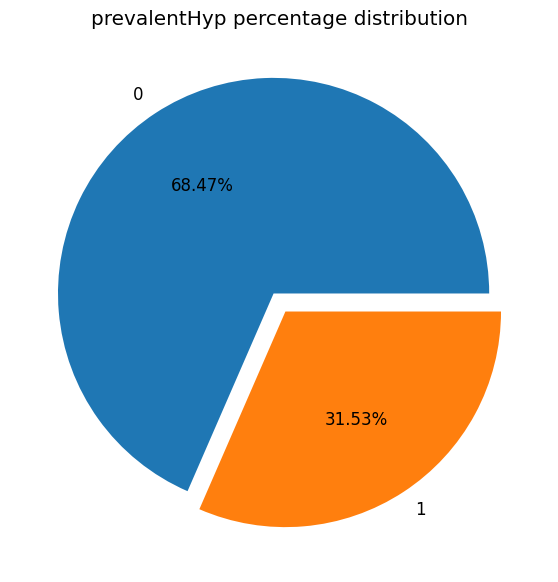

In [81]:
#Distribution of percentage "prevalentHyp" feature.
pie_chart("prevalentHyp")

In the dataset there are 68% observation who doesn't have hypertension and 32% are suffering from hypertension.

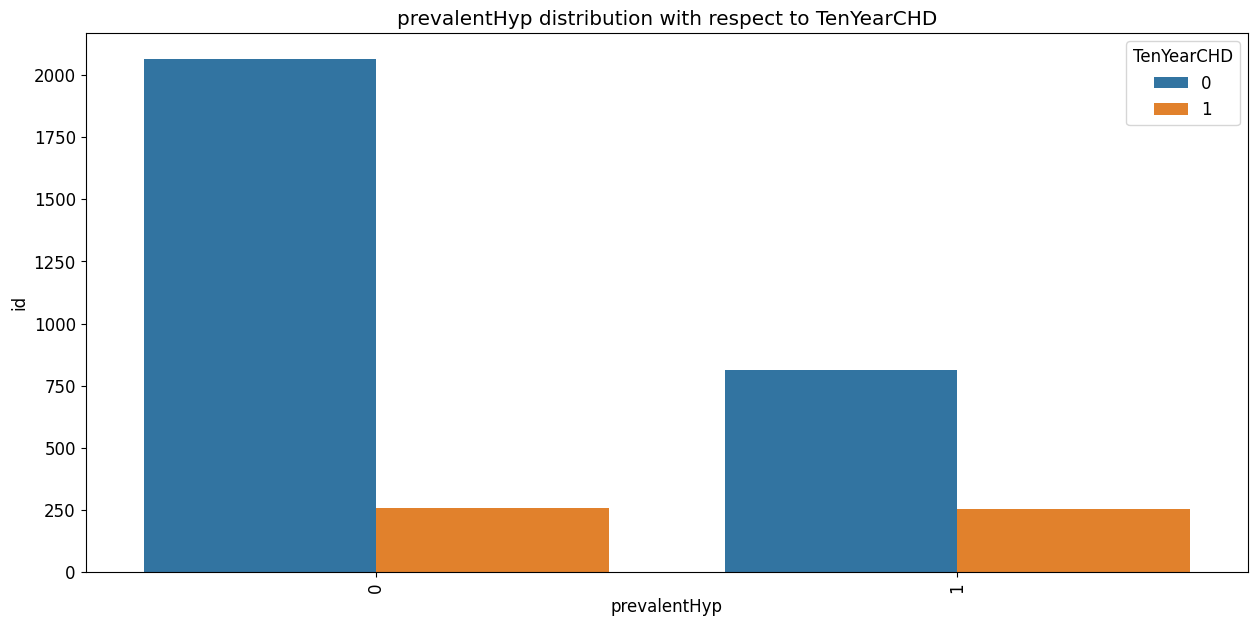

In [82]:
#Distribution of "prevalentHyp" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("prevalentHyp")

From the above graph it looks like people who are hypertensive and people who are not hypertensive both are at the same risk of CHD but the percentage is different which will be clear from the following graph.

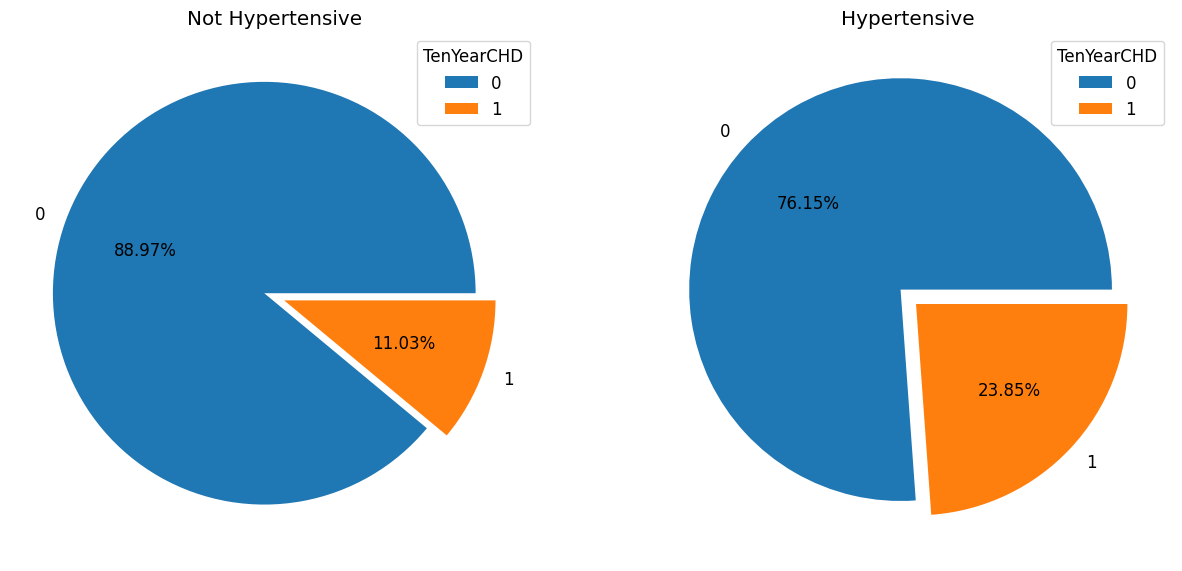

In [83]:
#Pie chart showing how different classes of prevalentHyp are distributed among the different classes of TenYearCHD
detailed_pie('prevalentHyp','Not Hypertensive','Hypertensive')

The above graph shows that from the person who are not hypertensive 11% of them are at the risk of TenYearCHD whereas the person who are hypertensive 24% of them are at the risk of TenYearCHD.

#### diabetes

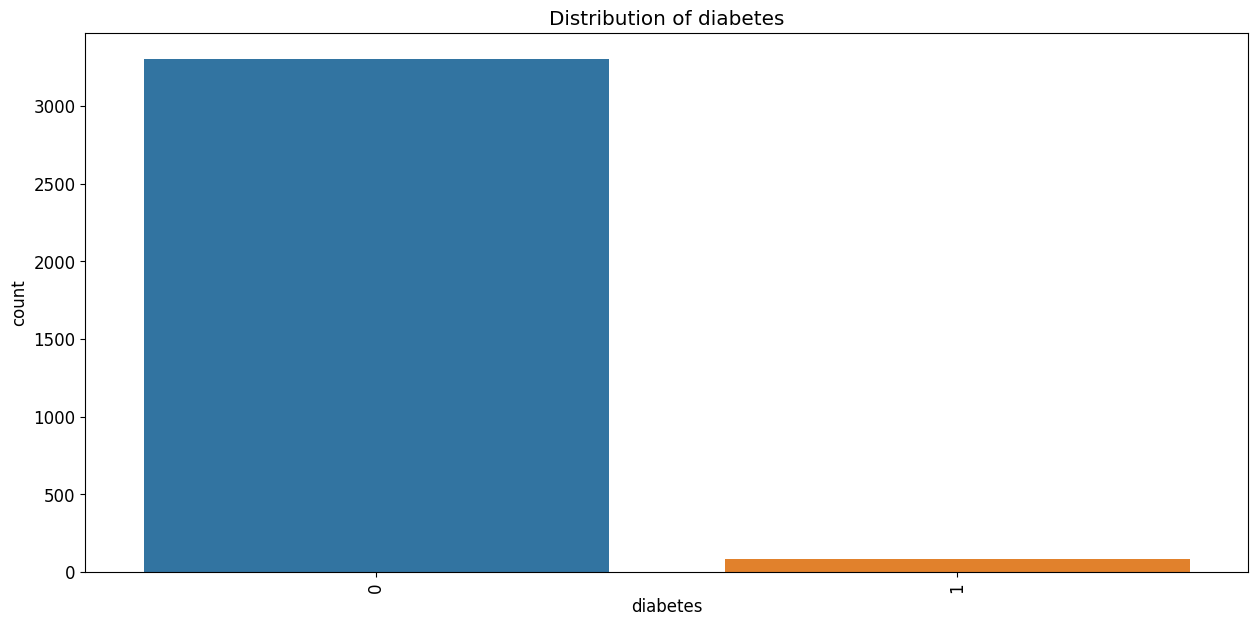

In [84]:
#Distribution of feature "diabetes".
bar_graph("diabetes")

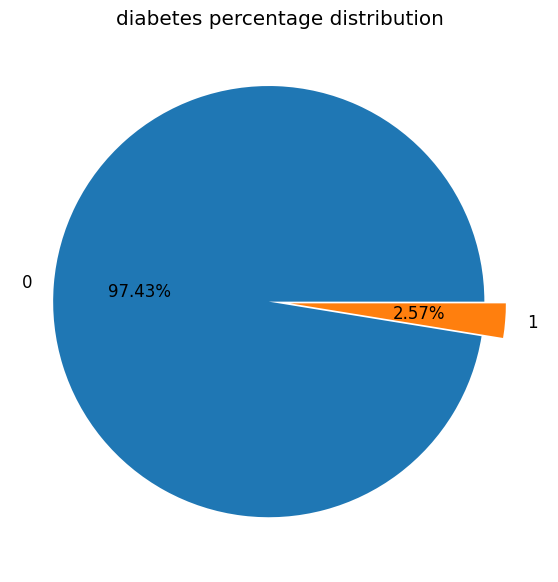

In [85]:
#Distribution of percentage "diabetes" feature.
pie_chart("diabetes")

97% of the people are non-diabetic and 3% are diabetic in the dataset.

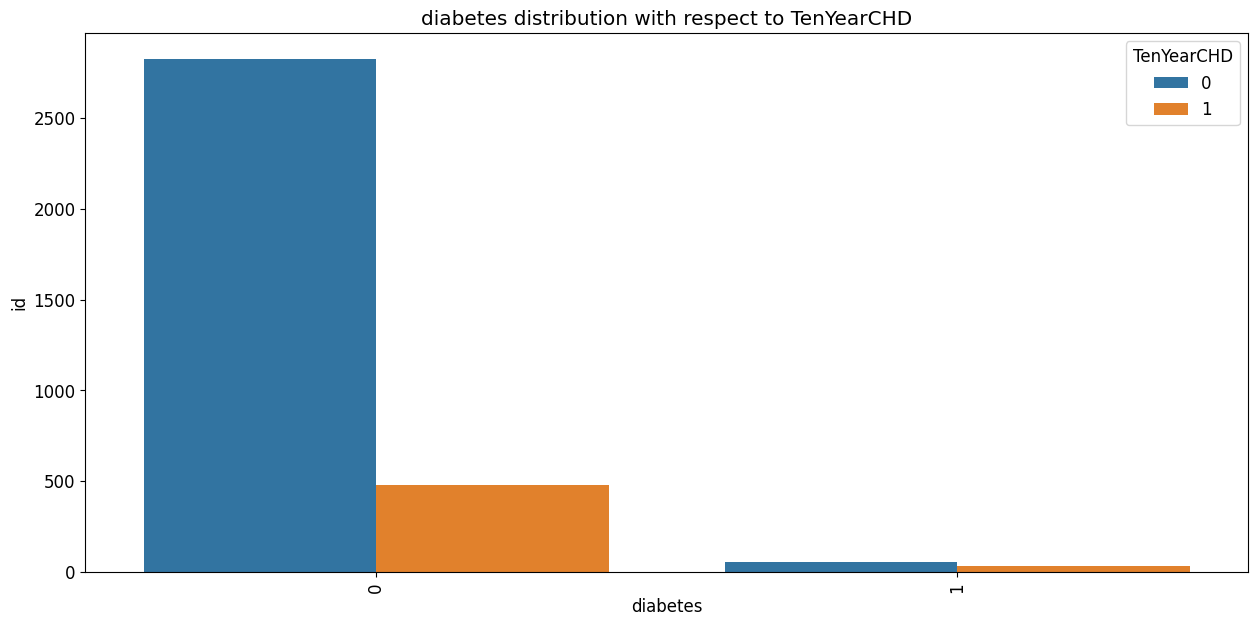

In [90]:
#Distribution of "diabetes" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("diabetes")

Since the number of diabetic patients are very less we will be visualizing the data with the help of pie chart.

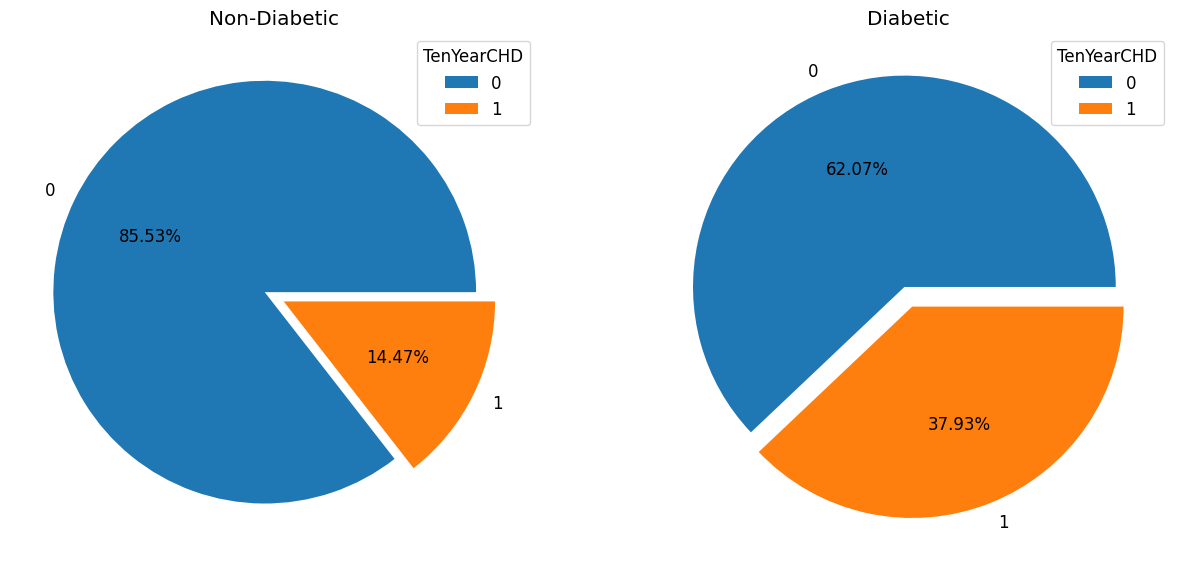

In [91]:
#Pie chart showing how different classes of diabetes are distributed among the different classes of TenYearCHD
detailed_pie('diabetes','Non-Diabetic','Diabetic')

14% of the non-diabetic patient are at a risk of TenYearCHD whereas this number increases to 38% in case of diabetic patient

#### totChol